In [1]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [5]:
df = pd.read_excel('Gold_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

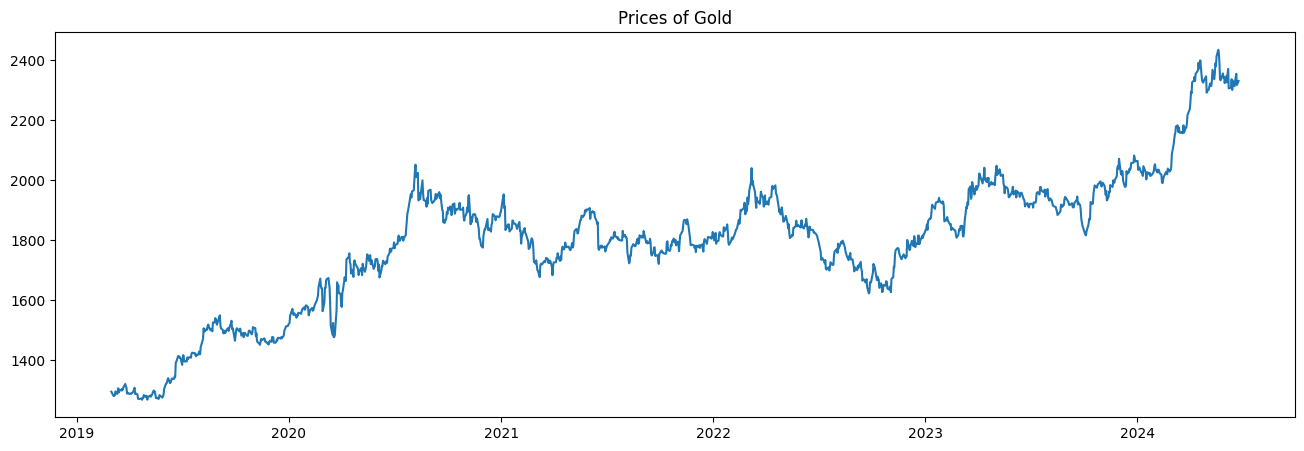

In [6]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of Gold')
    plt.show()

In [7]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,1312.199951,1312.199951,1288.900024,1296.400024,110
2019-03-04,2019-03-04,1285.500000,1287.000000,1281.900024,1284.800049,28
2019-03-05,2019-03-05,1287.000000,1287.000000,1282.000000,1282.000000,114
2019-03-06,2019-03-06,1287.099976,1287.099976,1282.599976,1284.900024,14
2019-03-07,2019-03-07,1281.000000,1284.599976,1281.000000,1283.800049,11
...,...,...,...,...,...,...
2024-06-17,2024-06-17,2320.199951,2320.199951,2309.600098,2312.399902,110
2024-06-18,2024-06-18,2311.800049,2330.399902,2311.800049,2330.399902,43
2024-06-20,2024-06-20,2328.899902,2354.000000,2328.300049,2353.800049,183
2024-06-21,2024-06-21,2331.199951,2331.199951,2316.399902,2316.399902,76


In [8]:
# Split dataset 

In [9]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [10]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [11]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [12]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.12885, saving model to save_model_7_2_1.keras
17/17 - 3s - 193ms/step - loss: 0.1288
Epoch 2/80

Epoch 2: loss improved from 0.12885 to 0.04539, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0454
Epoch 3/80

Epoch 3: loss improved from 0.04539 to 0.03548, saving model to save_model_7_2_1.keras
17/17 - 1s - 49ms/step - loss: 0.0355
Epoch 4/80

Epoch 4: loss improved from 0.03548 to 0.03420, saving model to save_model_7_2_1.keras
17/17 - 1s - 56ms/step - loss: 0.0342
Epoch 5/80

Epoch 5: loss did not improve from 0.03420
17/17 - 1s - 55ms/step - loss: 0.0345
Epoch 6/80

Epoch 6: loss improved from 0.03420 to 0.03388, saving model to save_model_7_2_1.keras
17/17 - 1s - 55ms/step - loss: 0.0339
Epoch 7/80

Epoch 7: loss improved from 0.03388 to 0.03046, saving model to save_model_7_2_1.keras
17/17 - 1s - 56ms/step - loss: 0.0305
Epoch 8/80

Epoch 8: loss improved from 0.03046 to 0.02891, saving model to save_model_7_2_1.keras


In [13]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Original y_train shape: (837, 1)
Predicted y_train shape: (837, 1)


In [14]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [15]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [17]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.887852132320404], [0.8500317931175232], [0.8209747076034546], [0.8044230341911316], [0.7948563098907471], [0.7863019704818726], [0.7755942344665527], [0.7623853087425232], [0.7478640675544739], [0.7334540486335754], [0.7200777530670166], [0.7080178260803223], [0.6971238255500793], [0.687091588973999], [0.6776580810546875], [0.6686752438545227], [0.6600983142852783], [0.6519373059272766], [0.644210934638977], [0.6369189620018005], [0.6300351023674011], [0.6235137581825256], [0.6173011660575867], [0.6113450527191162], [0.6056014895439148], [0.6000356078147888], [0.5946216583251953], [0.5893405675888062], [0.5841782093048096], [0.5791237354278564]]


In [18]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [19]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2303.29251207]
 [2259.24695058]
 [2225.40707304]
 [2206.13099661]
 [2194.98959089]
 [2185.02720847]
 [2172.55698068]
 [2157.17386771]
 [2140.26243235]
 [2123.48052643]
 [2107.90249457]
 [2093.85750537]
 [2081.17035395]
 [2069.4868127 ]
 [2058.50055076]
 [2048.03913987]
 [2038.05044895]
 [2028.54613981]
 [2019.54800894]
 [2011.05577868]
 [2003.03883675]
 [1995.44408027]
 [1988.20889639]
 [1981.27240767]
 [1974.58345484]
 [1968.10142979]
 [1961.79634501]
 [1955.64598751]
 [1949.63390581]
 [1943.74746627]]


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

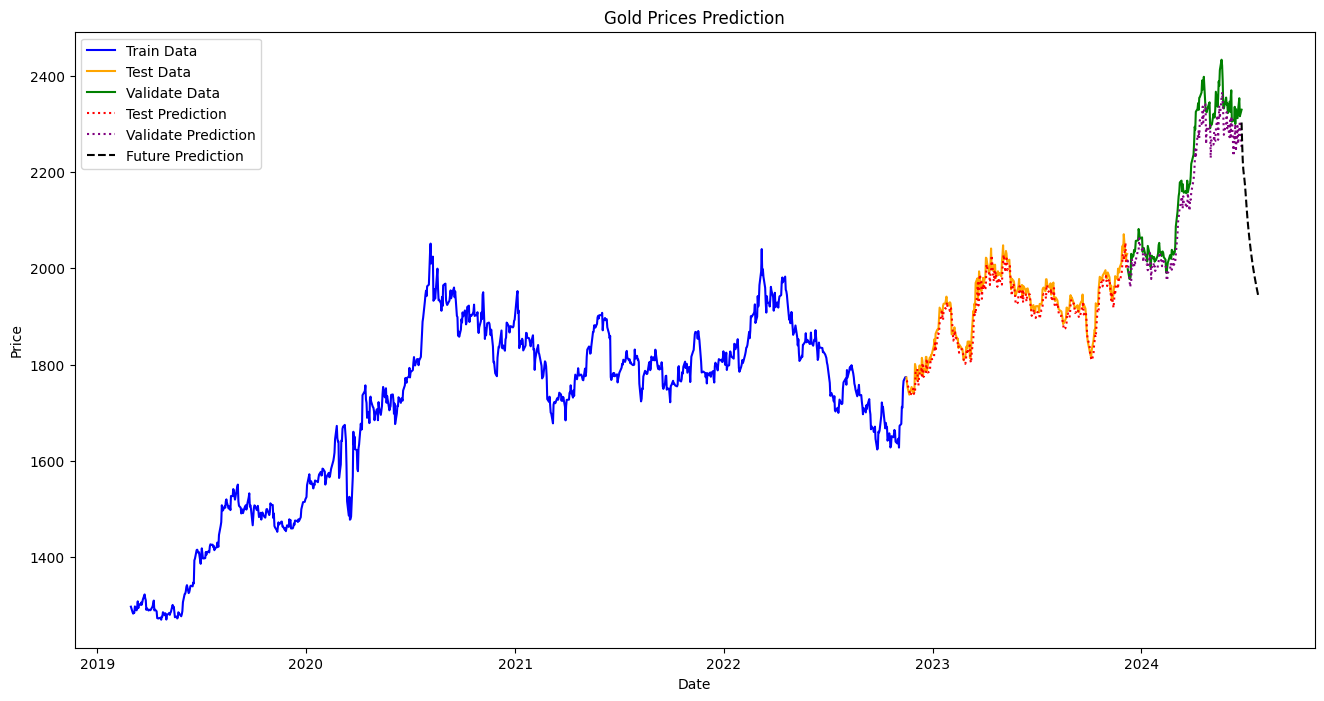

In [21]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 195.27551338569808
Lower Bound of Future Prediction: [[2108.01699869]
 [2063.97143719]
 [2030.13155966]
 [2010.85548323]
 [1999.71407751]
 [1989.75169508]
 [1977.28146729]
 [1961.89835433]
 [1944.98691897]
 [1928.20501304]
 [1912.62698118]
 [1898.58199198]
 [1885.89484056]
 [1874.21129931]
 [1863.22503737]
 [1852.76362648]
 [1842.77493556]
 [1833.27062643]
 [1824.27249556]
 [1815.78026529]
 [1807.76332337]
 [1800.16856689]
 [1792.93338301]
 [1785.99689429]
 [1779.30794145]
 [1772.82591641]
 [1766.52083163]
 [1760.37047413]
 [1754.35839243]
 [1748.47195289]]
Upper Bound of Future Prediction: [[2498.56802546]
 [2454.52246396]
 [2420.68258643]
 [2401.40651   ]
 [2390.26510428]
 [2380.30272186]
 [2367.83249406]
 [2352.4493811 ]
 [2335.53794574]
 [2318.75603981]
 [2303.17800796]
 [2289.13301875]
 [2276.44586733]
 [2264.76232608]
 [2253.77606414]
 [2243.31465326]
 [2233.32596234]
 [2223.8216532 ]
 [2214.82352233]
 [2206.33129206]
 [2198.31435014]
 [2190.71959366]
 [2183.4844

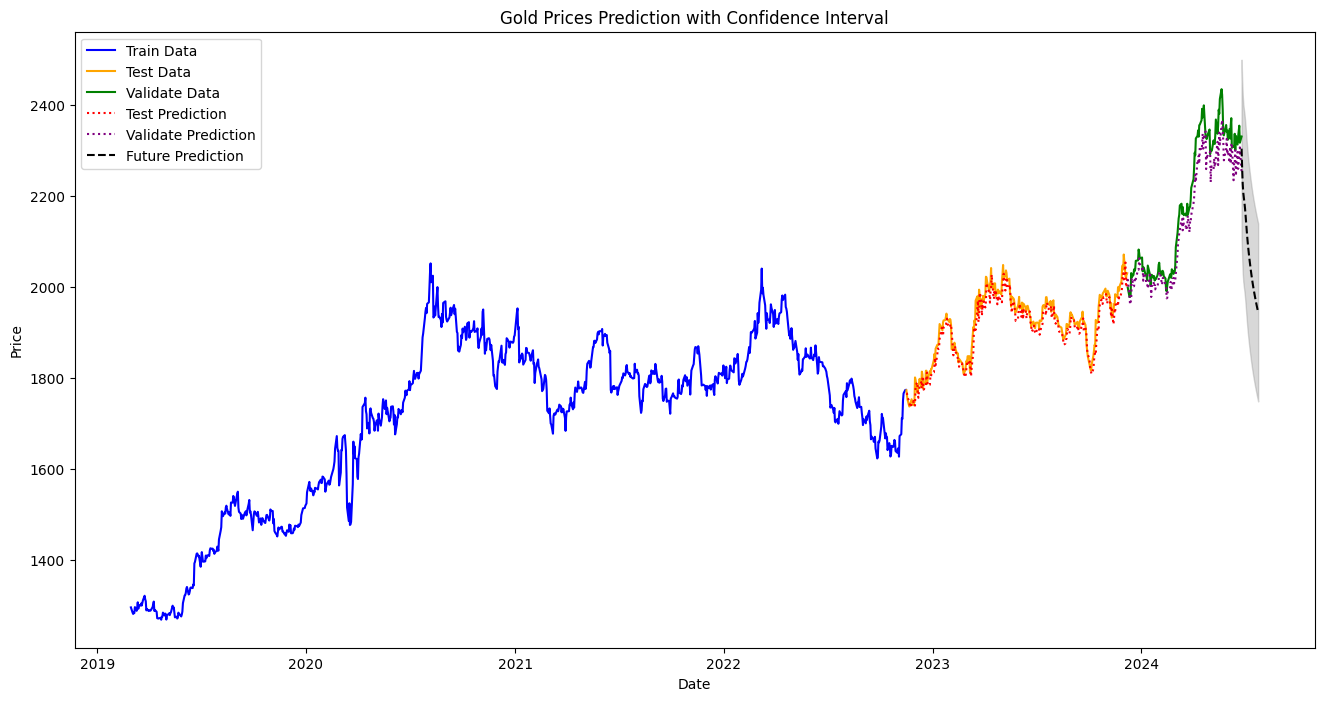

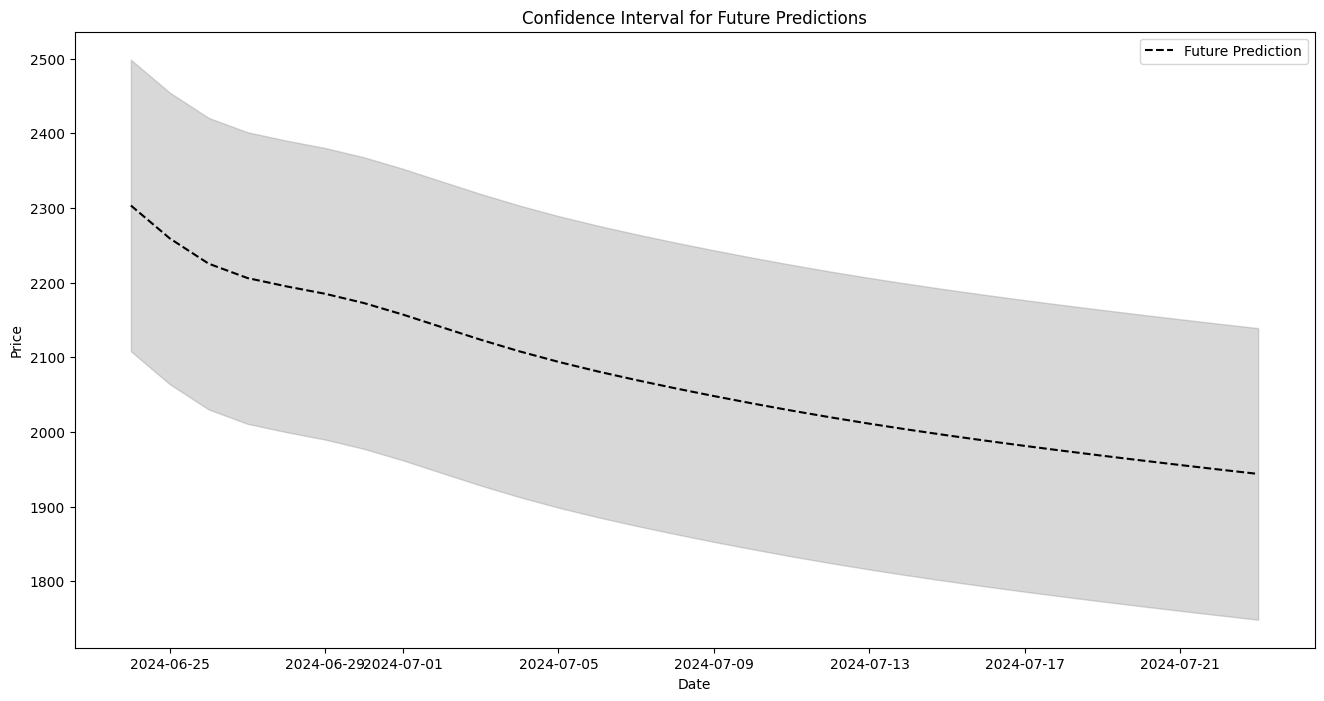

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [23]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  16.870003803838834
MAPE:  0.8739913815705614
RMSE:  21.170303699504554

** Validate **
MAE:  37.05549949363423
MAPE:  1.6556178176512375
RMSE:  44.49274678428118


In [24]:
# Split dataset 6-3-1

In [25]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [26]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [27]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.13858, saving model to save_model_6_3_1.keras
15/15 - 3s - 194ms/step - loss: 0.1386
Epoch 2/80

Epoch 2: loss improved from 0.13858 to 0.04030, saving model to save_model_6_3_1.keras
15/15 - 1s - 44ms/step - loss: 0.0403
Epoch 3/80

Epoch 3: loss improved from 0.04030 to 0.03682, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0368
Epoch 4/80

Epoch 4: loss did not improve from 0.03682
15/15 - 1s - 45ms/step - loss: 0.0407
Epoch 5/80

Epoch 5: loss improved from 0.03682 to 0.03186, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0319
Epoch 6/80

Epoch 6: loss improved from 0.03186 to 0.03018, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0302
Epoch 7/80

Epoch 7: loss improved from 0.03018 to 0.02930, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0293
Epoch 8/80

Epoch 8: loss did not improve from 0.02930
15/15 - 1s - 44ms/step - loss: 0.0314
Epoch 

In [29]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [30]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [31]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [33]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8311909437179565], [0.7784932255744934], [0.7249431014060974], [0.6890960335731506], [0.6671410799026489], [0.6509330868721008], [0.6342283487319946], [0.6142885088920593], [0.5914602279663086], [0.5677832365036011], [0.5454785823822021], [0.5259464979171753], [0.509522020816803], [0.49577969312667847], [0.48399817943573], [0.4735082983970642], [0.4638516902923584], [0.45479148626327515], [0.44624942541122437], [0.4382243752479553], [0.4307267665863037], [0.42374199628829956], [0.4172217845916748], [0.41109156608581543], [0.4052666425704956], [0.399666965007782], [0.39422619342803955], [0.3888967037200928], [0.38364773988723755], [0.3784630298614502]]


In [34]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [35]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2237.30490013]
 [2175.9331453 ]
 [2113.56867853]
 [2071.82118859]
 [2046.25245276]
 [2027.37662645]
 [2007.92229086]
 [1984.7003563 ]
 [1958.11454368]
 [1930.54032289]
 [1904.56432597]
 [1881.81726326]
 [1862.68931963]
 [1846.68500682]
 [1832.9642577 ]
 [1820.74774378]
 [1809.5016594 ]
 [1798.95014711]
 [1789.00206429]
 [1779.65609205]
 [1770.9243781 ]
 [1762.78991563]
 [1755.19647805]
 [1748.05722647]
 [1741.2735214 ]
 [1734.75213773]
 [1728.41581595]
 [1722.20909301]
 [1716.0961505 ]
 [1710.05803797]]


In [36]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

Margin of Error: 284.382117320297
Lower Bound of Future Prediction: [[1952.92278281]
 [1891.55102797]
 [1829.18656121]
 [1787.43907127]
 [1761.87033544]
 [1742.99450913]
 [1723.54017354]
 [1700.31823898]
 [1673.73242636]
 [1646.15820557]
 [1620.18220865]
 [1597.43514594]
 [1578.30720231]
 [1562.3028895 ]
 [1548.58214038]
 [1536.36562646]
 [1525.11954208]
 [1514.56802979]
 [1504.61994697]
 [1495.27397473]
 [1486.54226078]
 [1478.40779831]
 [1470.81436073]
 [1463.67510915]
 [1456.89140408]
 [1450.37002041]
 [1444.03369863]
 [1437.82697569]
 [1431.71403318]
 [1425.67592065]]
Upper Bound of Future Prediction: [[2521.68701745]
 [2460.31526262]
 [2397.95079585]
 [2356.20330591]
 [2330.63457008]
 [2311.75874377]
 [2292.30440818]
 [2269.08247362]
 [2242.496661  ]
 [2214.92244021]
 [2188.94644329]
 [2166.19938058]
 [2147.07143695]
 [2131.06712414]
 [2117.34637502]
 [2105.1298611 ]
 [2093.88377672]
 [2083.33226443]
 [2073.38418161]
 [2064.03820937]
 [2055.30649542]
 [2047.17203295]
 [2039.578595

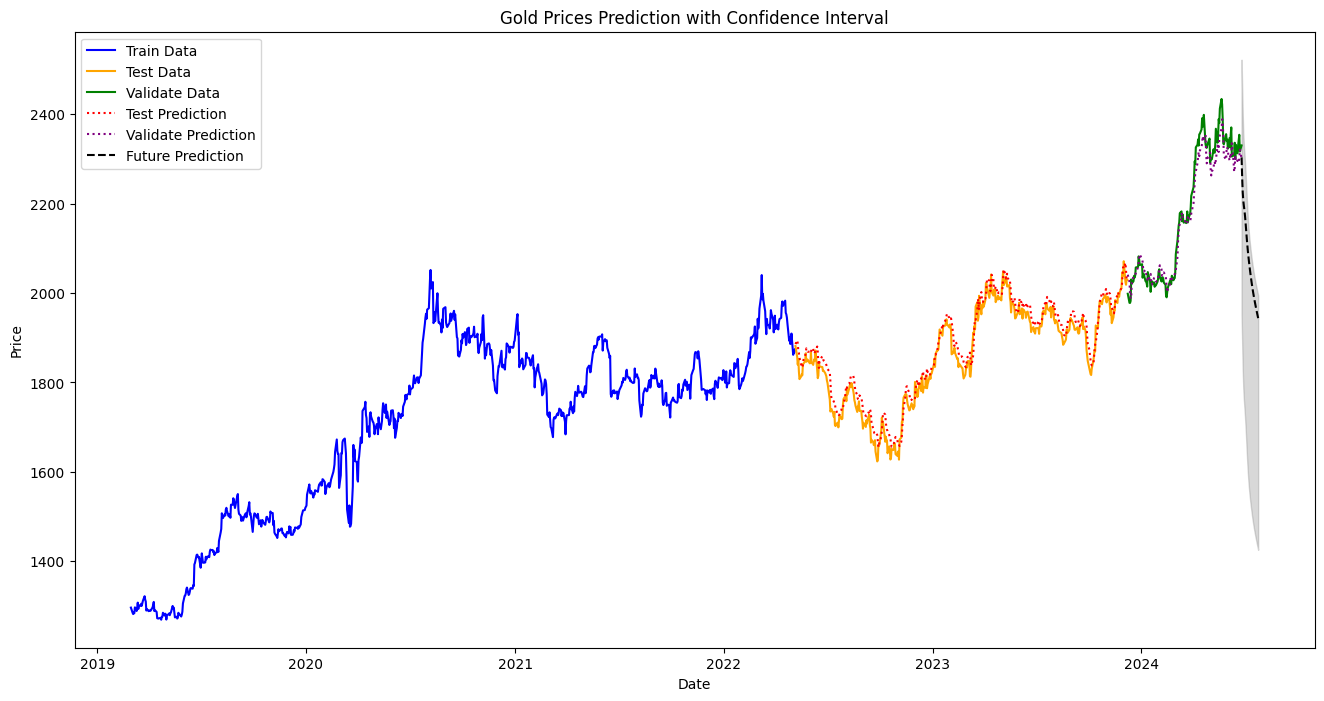

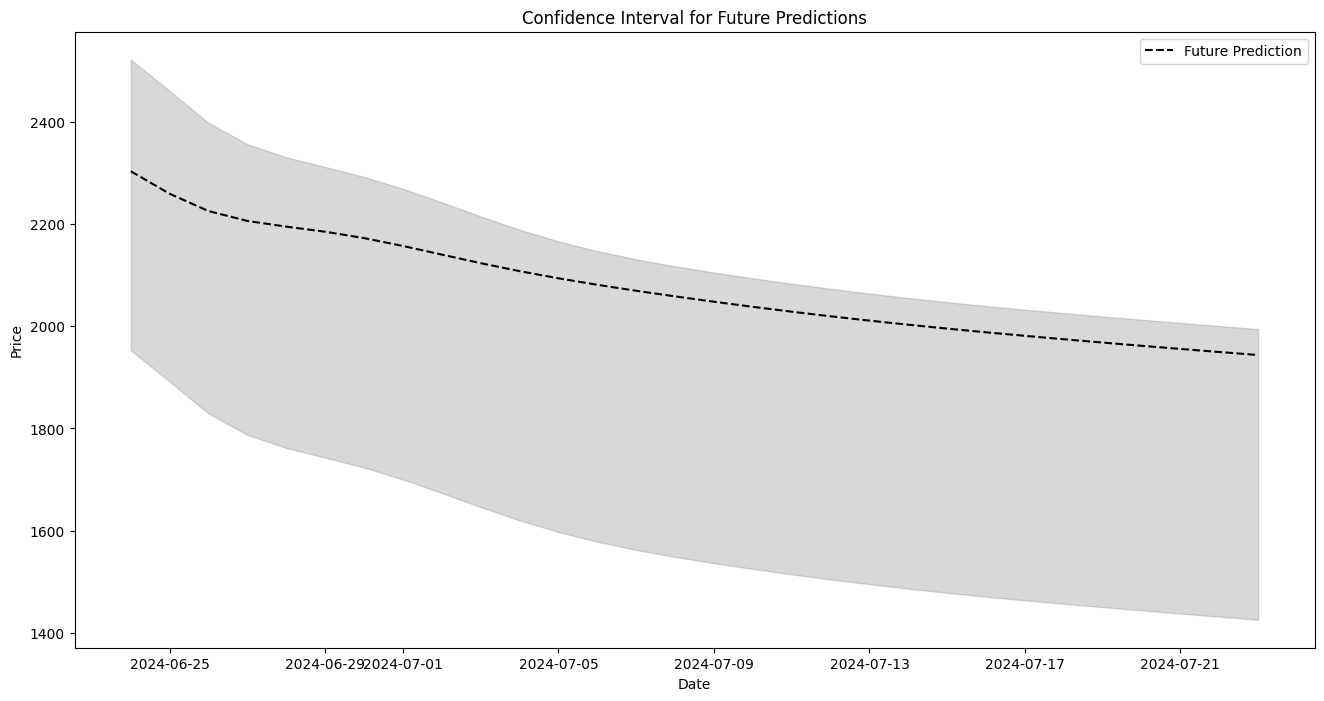

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [38]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  20.462222434636168
MAPE:  1.1161649580123465
RMSE:  24.77133086917205

** Validate **
MAE:  23.322583912037064
MAPE:  1.0432324020655472
RMSE:  29.09665394143996


In [39]:
# Split dataset 5-3-2 

In [40]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [41]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [42]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [43]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.14787, saving model to save_model_5_3_2.keras
12/12 - 3s - 265ms/step - loss: 0.1479
Epoch 2/80

Epoch 2: loss improved from 0.14787 to 0.04802, saving model to save_model_5_3_2.keras
12/12 - 1s - 62ms/step - loss: 0.0480
Epoch 3/80

Epoch 3: loss improved from 0.04802 to 0.04018, saving model to save_model_5_3_2.keras
12/12 - 1s - 60ms/step - loss: 0.0402
Epoch 4/80

Epoch 4: loss improved from 0.04018 to 0.03148, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0315
Epoch 5/80

Epoch 5: loss improved from 0.03148 to 0.03053, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0305
Epoch 6/80

Epoch 6: loss improved from 0.03053 to 0.02931, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0293
Epoch 7/80

Epoch 7: loss improved from 0.02931 to 0.02827, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0283
Epoch 8/80

Epoch 8: loss did not improve from 0.02827


In [44]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [45]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [46]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [47]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [48]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9005051851272583], [0.8847169280052185], [0.8693171143531799], [0.8568081259727478], [0.8471755981445312], [0.8391899466514587], [0.8316594958305359], [0.8240035176277161], [0.8162462115287781], [0.8087491393089294], [0.801922619342804], [0.7960464358329773], [0.7912210822105408], [0.787405252456665], [0.7844857573509216], [0.7823348641395569], [0.7808420658111572], [0.7799196839332581], [0.7794950008392334], [0.7794983386993408], [0.7798557281494141], [0.7804867625236511], [0.7813072204589844], [0.7822343707084656], [0.7831921577453613], [0.784114420413971], [0.7849466800689697], [0.7856464982032776], [0.7861820459365845], [0.7865327000617981]]


In [49]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [50]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2318.02825552]
 [2299.64125359]
 [2281.70663286]
 [2267.13866683]
 [2255.92062633]
 [2246.62053777]
 [2237.85057585]
 [2228.93442475]
 [2219.90026721]
 [2211.169178  ]
 [2203.21901385]
 [2196.37561139]
 [2190.75600527]
 [2186.3120905 ]
 [2182.91204692]
 [2180.40711701]
 [2178.66860429]
 [2177.59439849]
 [2177.09981262]
 [2177.10369989]
 [2177.51991559]
 [2178.25481813]
 [2179.21032333]
 [2180.29008237]
 [2181.40552101]
 [2182.47958798]
 [2183.44883745]
 [2184.26384555]
 [2184.88754436]
 [2185.29591611]]


In [51]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

Margin of Error: 78.15140829130833
Lower Bound of Future Prediction: [[2239.87684723]
 [2221.48984529]
 [2203.55522457]
 [2188.98725854]
 [2177.76921804]
 [2168.46912948]
 [2159.69916756]
 [2150.78301646]
 [2141.74885892]
 [2133.01776971]
 [2125.06760555]
 [2118.2242031 ]
 [2112.60459698]
 [2108.16068221]
 [2104.76063863]
 [2102.25570871]
 [2100.517196  ]
 [2099.4429902 ]
 [2098.94840433]
 [2098.9522916 ]
 [2099.3685073 ]
 [2100.10340984]
 [2101.05891503]
 [2102.13867408]
 [2103.25411272]
 [2104.32817969]
 [2105.29742916]
 [2106.11243726]
 [2106.73613607]
 [2107.14450781]]
Upper Bound of Future Prediction: [[2396.17966381]
 [2377.79266188]
 [2359.85804115]
 [2345.29007512]
 [2334.07203462]
 [2324.77194606]
 [2316.00198414]
 [2307.08583305]
 [2298.0516755 ]
 [2289.32058629]
 [2281.37042214]
 [2274.52701968]
 [2268.90741356]
 [2264.46349879]
 [2261.06345522]
 [2258.5585253 ]
 [2256.82001258]
 [2255.74580678]
 [2255.25122091]
 [2255.25510818]
 [2255.67132389]
 [2256.40622643]
 [2257.36173

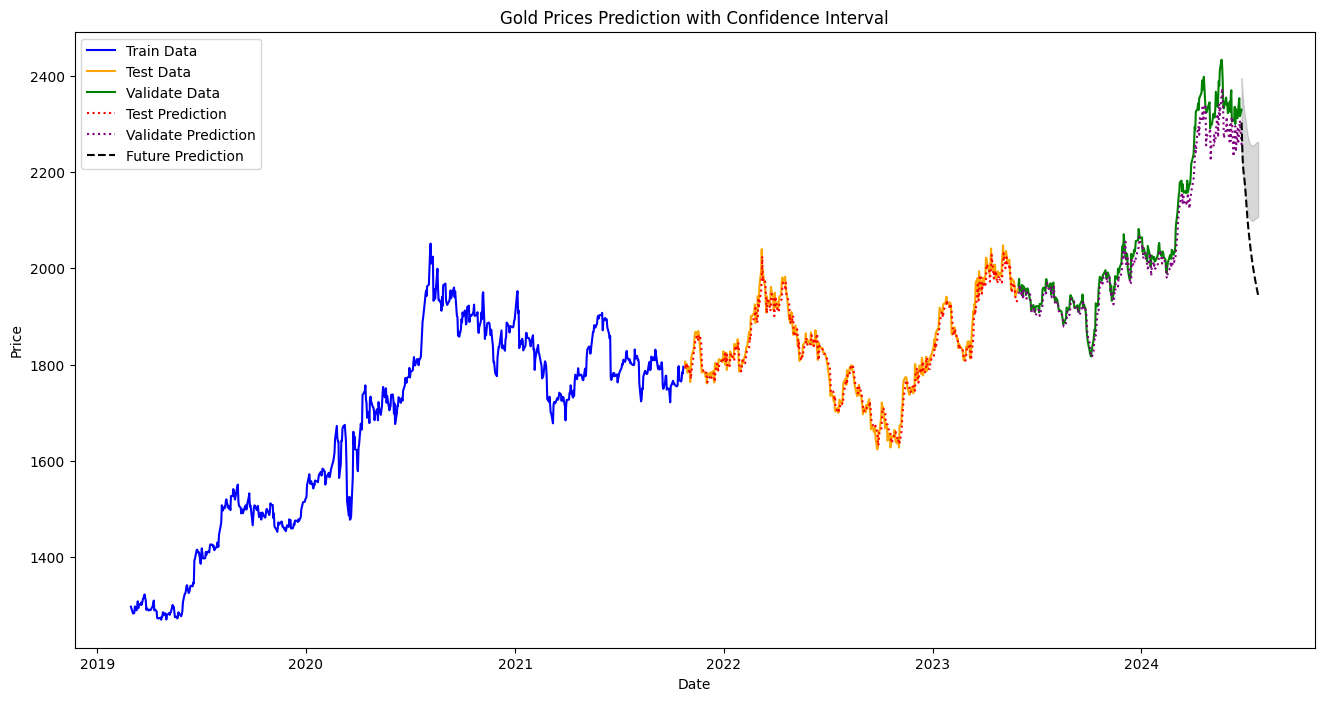

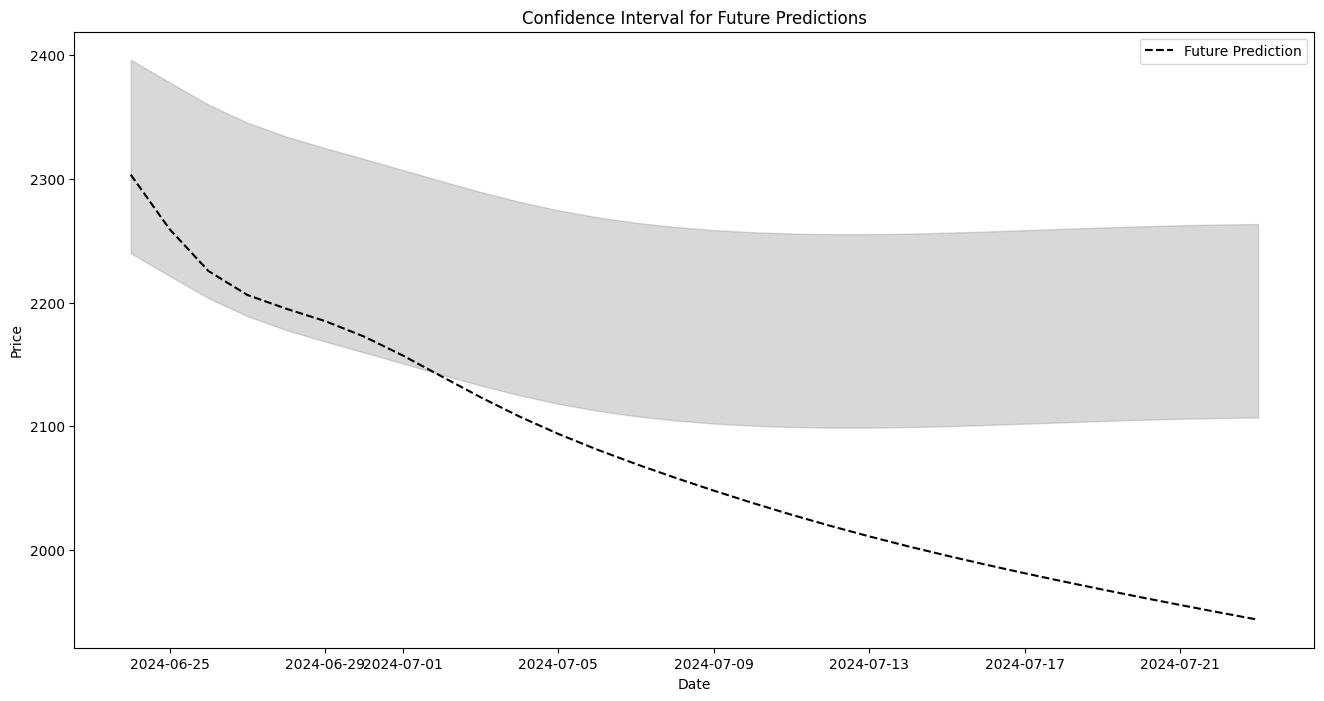

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [53]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.589256229543286
MAPE:  0.7915493012821527
RMSE:  18.885093652607523

** Validate **
MAE:  24.5442911027532
MAPE:  1.1370015136373108
RMSE:  33.220813999743534


In [55]:
import pandas as pd

# Original data
data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [12.5019, 13.0908, 18.5606],
    "Testing MAPE": ["0.6512%", "0.7031%", "1.0217%"],  # Add percentage signs
    "Testing RMSE": [16.8448, 17.2823, 23.9815],
    "Validation MAE": [21.3910, 26.0325, 23.6238],
    "Validation MAPE": ["0.9552%", "1.1637%", "1.0993%"],  # Add percentage signs
    "Validation RMSE": [28.0878, 32.3465, 32.1555],
    "Margin Of Error": [195.27551338569808, 284.382117320297, 78.15140829130833],
    "Confidence Score": [0.8117681179399556, 0.696766272106703, 0.9292047120435254],
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the updated DataFrame
print(df.to_string(index=False))


Model Ratio  Testing MAE Testing MAPE  Testing RMSE  Validation MAE Validation MAPE  Validation RMSE  Margin Of Error  Confidence Score
 LSTM 7-2-1      12.5019      0.6512%       16.8448         21.3910         0.9552%          28.0878       195.275513          0.811768
 LSTM 6-3-1      13.0908      0.7031%       17.2823         26.0325         1.1637%          32.3465       284.382117          0.696766
 LSTM 5-3-2      18.5606      1.0217%       23.9815         23.6238         1.0993%          32.1555        78.151408          0.929205
